# Assignment 2

In [1]:
#importing neccessary library
import pandas as pd
import numpy as np
import requests
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.tokenize import word_tokenize

In [2]:
data=pd.read_csv('C:/Users/Amruth PC/Desktop/Data Science/SEM 2/RNR_Unstructured/Case_Study_Customer_Concern_Areas/amazon_reviews.csv')
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [3]:
data.isnull().sum()

Unnamed: 0        0
asin              0
helpful           0
overall           0
reviewText        2
reviewTime        0
reviewerID        0
reviewerName      5
summary           0
unixReviewTime    0
dtype: int64

In [4]:
data.dropna(inplace=True)

## Assigning sentiment depending on overall score

In [5]:
data['sentiment']=data['overall'].apply(lambda x:1 if x>=3 else 0)
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09,1
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09,0
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09,1
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09,0
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09,0


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(data['reviewText'])

wordcloud = WordCloud(width=500, height=500, margin=0, background_color="white").generate(input_string)

plt.rcParams['figure.figsize'] = [20, 5]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<Figure size 2000x500 with 1 Axes>

In [7]:
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
lemm=WordNetLemmatizer()
def clean_text(sent):
    tokens = word_tokenize(sent)
    stop_updated=stop+["...","..","."] + ['nook','the','will','one','want','say','see','go','going','put','got','lot','many','able','aaa','aac',"n't",'use','kindle']
    stemmed = [lemm.lemmatize(term,pos='v') for term in tokens\
              if term.lower() not in stop_updated and \
              term.lower() not in list(punctuation) and \
              len(term) >2]
    res = " ".join(stemmed)
    return res

In [9]:
data['clean_text']=data.reviewText.apply(clean_text)

In [10]:
z=[]
for i in data['clean_text']:
    if len(re.findall(('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)'),i))>0:
        z.append(i.replace(re.findall(('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)'),i)[0][0],''))
    else:
        z.append(i)
data['clean_text']=z
data.head(1)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment,clean_text
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09,1,GPS husband OTR road trucker Impressed ship ti...


In [11]:
d=[]
for i in data['clean_text']:
    d.append(re.sub(r'\d+', '',i))
data['clean_text']=d

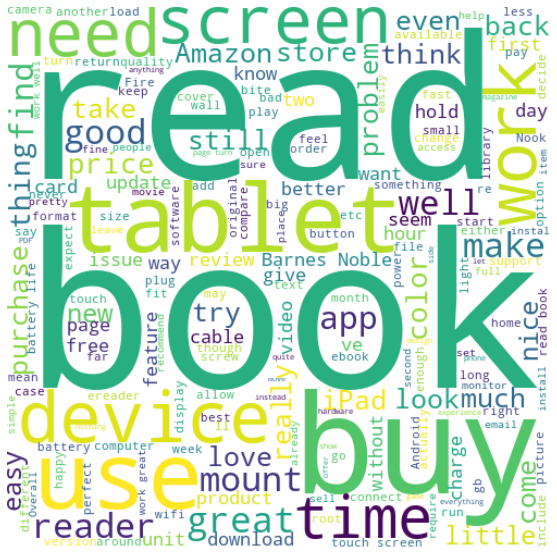

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(data['clean_text'])

wordcloud = WordCloud(width=500, height=500, margin=0, background_color="white").generate(input_string)

plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [13]:
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,sentiment,clean_text
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09,1,GPS husband OTR road trucker Impressed ship ti...
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09,0,professional OTR truck driver buy TND truck s...
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09,1,Well 've unit truck four days Prior Garmin T n...
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09,0,write long review even think unit deserve 've ...
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09,0,'ve mine year try route non truck rout tell tr...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf_vect=TfidfVectorizer(ngram_range=(2,2))

In [16]:
X=tfidf_vect.fit_transform(data['clean_text'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
tfidf=pd.DataFrame(X.toarray(),columns=tfidf_vect.get_feature_names())
tfidf.head()

,aapparenty company,abandon normal,abilities aware,abilities full,abilities screen,abilities strip,ability add,ability borrow,ability box,ability buy,...,zoom pinch,zoom rotate,zoom scroll,zoom text,zoom touch,zoom type,zoom update,zs photos,zune place,zune ve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bigram bar graph on the top words 25 words

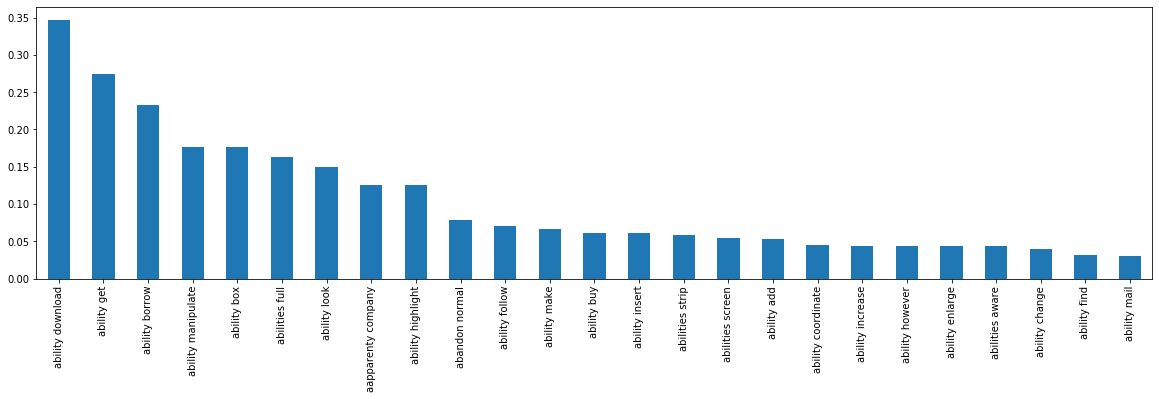

In [18]:
tfidf.sum().head(25).sort_values(ascending=False).plot(kind='bar')

## Prediction using ML Models

In [27]:
X=data['clean_text']
Y=data['sentiment']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [33]:
tfidf_vect2=TfidfVectorizer()

In [34]:
X_train_bow = tfidf_vect2.fit_transform(X_train)

In [35]:
X_test_bow = tfidf_vect2.transform(X_test)

In [36]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
mng=MultinomialNB()
mng.fit(X_train_bow,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
from sklearn.metrics import confusion_matrix
print("Multinomial Score=",mng.score(X_test_bow,y_test)*100)
prediction = mng.predict(X_test_bow)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Multinomial Score= 83.89261744966443
Confusion Matrix is :
[[  0  48]
 [  0 250]]


In [45]:
classifier=AdaBoostClassifier(n_estimators=200)
classifier.fit(X_train_bow,y_train)
pred=classifier.predict(X_test_bow)

In [46]:

from sklearn.metrics import confusion_matrix
print("AdaBoostClassifier Score=",classifier.score(X_test_bow,y_test)*100)
prediction = classifier.predict(X_test_bow)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

AdaBoostClassifier Score= 82.88590604026845
Confusion Matrix is :
[[ 17  31]
 [ 20 230]]


## Here we can observe that this is a very imbalanced data so data is getting biased over class with more data so we need to perform over sampling techniques such as SMOTE analysis and get the data into a balanced state

# Bigram in the negative words

In [19]:

ls=['poor', 'waste', 'bad', 'defective', 'disgusting', 'untrusty', 'worst', 'horrible', 'unexpectedly', 'slow']

In [20]:
lst=[]
for j in tfidf.columns:
    for k in ls:
        if k in j.split():
            lst.append(j)
(lst)

['absolute waste',
 'access bad',
 'allow poor',
 'android bad',
 'angry waste',
 'apps poor',
 'backup bad',
 'bad all',
 'bad anything',
 'bad book',
 'bad boys',
 'bad burn',
 'bad buy',
 'bad cable',
 'bad call',
 'bad came',
 'bad cell',
 'bad change',
 'bad could',
 'bad create',
 'bad deal',
 'bad design',
 'bad device',
 'bad display',
 'bad egg',
 'bad enough',
 'bad everyone',
 'bad everything',
 'bad experience',
 'bad first',
 'bad further',
 'bad gadget',
 'bad glad',
 'bad good',
 'bad habit',
 'bad in',
 'bad ish',
 'bad landscape',
 'bad look',
 'bad minor',
 'bad navigation',
 'bad news',
 'bad nook',
 'bad obviously',
 'bad open',
 'bad opinion',
 'bad pay',
 'bad place',
 'bad planning',
 'bad problem',
 'bad protective',
 'bad pun',
 'bad reader',
 'bad really',
 'bad receive',
 'bad review',
 'bad software',
 'bad tablet',
 'bad taste',
 'bad thing',
 'bad things',
 'bad three',
 'bad unit',
 'bad unplug',
 'bad use',
 'bad wall',
 'bad would',
 'battery bad',
 'be

In [21]:
negative=tfidf[tfidf.columns[tfidf.columns.isin(lst)]]

## Cluster creation using kmeans

In [22]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [23]:
data['cluster']=y_kmeans

In [24]:
Bow=tfidf.columns
num_clusters=5

In [25]:
ls=[]
print('Top term per cluster:')
order_centroids_arg=kmeans.cluster_centers_.argsort()[:,::-1]
for i in  range(num_clusters):
    print('Cluster:',i)
    for ind in order_centroids_arg[i,:10]:
        print(Bow[ind])
        ls.append(Bow[ind])

Top term per cluster:
Cluster: 0
barnes noble
work well
wall mount
work fine
battery life
touch screen
hdmi cable
cable work
read book
would recommend
Cluster: 1
great price
great buy
perfectly great
love love
hdmi cable
buy great
cable great
plug cable
product great
care spare
Cluster: 2
volume button
great love
happy purchase
money well
work great
spent love
clear volume
little speaker
button work
speaker microphone
Cluster: 3
easy install
move around
like fact
wall mount
install come
install work
work great
mount easy
lcd easy
well easy
Cluster: 4
work great
mount work
easy mount
great deal
need small
great need
mount wall
barnes noble
wall stud
still work


## Plot a bar graph for the top 25 customer concern areas

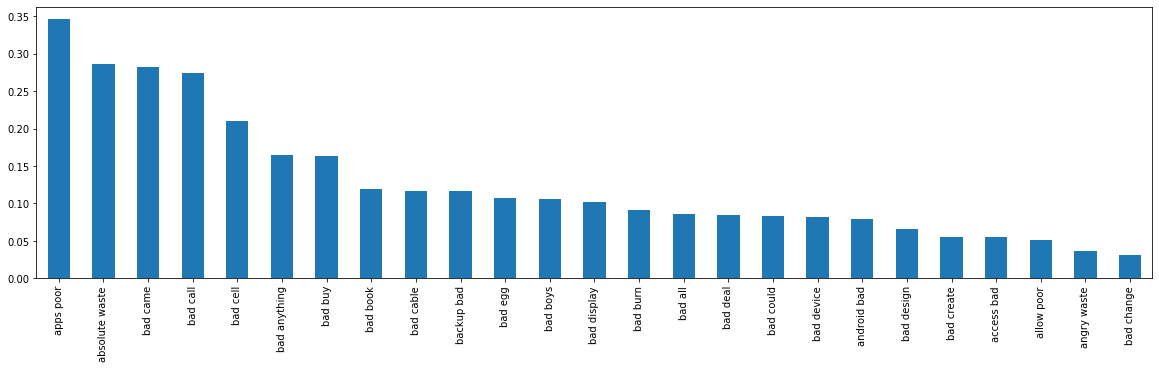

In [26]:
negative.sum().head(25).sort_values(ascending=False).plot(kind='bar')